# all import statements required for my project bitcoin prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as sm
import statsmodels.formula.api as smf

# reading files usin csv

In [2]:
data=pd.read_csv("bitcoin.csv")

# Displays first five rows

In [3]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


# Found 1024th value in column named btc_market_price

In [4]:
data.btc_market_price[1023]

13.6888

# plots to determine which feauture is best with pearson coefficient as 1

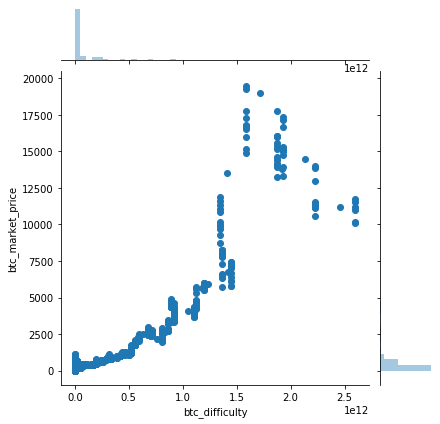

In [5]:
x= sns.jointplot(x="btc_difficulty",y="btc_market_price", data=data)

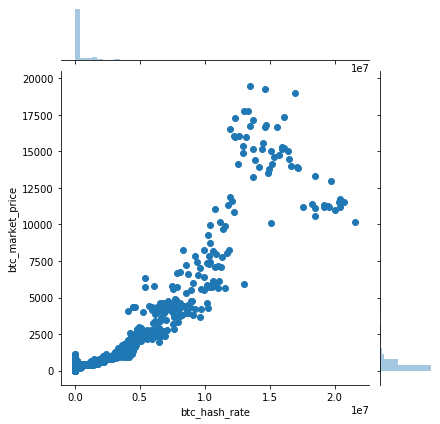

In [6]:
p= sns.jointplot( x="btc_hash_rate",y="btc_market_price", data=data)

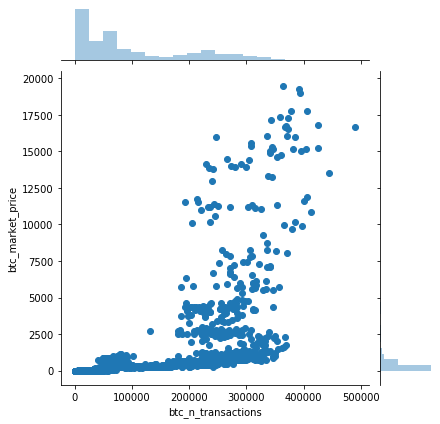

In [7]:
n= sns.jointplot(x="btc_n_transactions",y="btc_market_price", data=data)

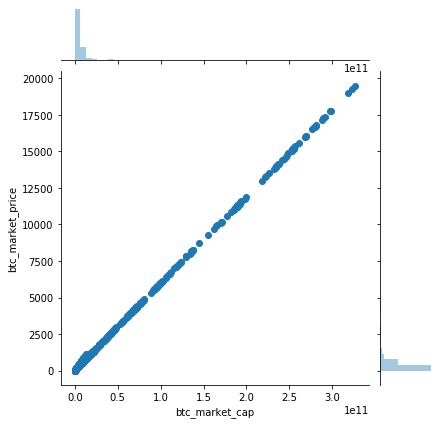

In [8]:
s= sns.jointplot(x="btc_market_cap", y="btc_market_price", data=data)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as sm

# fillna() is used to fill NAN values
## 1.while filling if we have string values we should use median i.e most frequent values because we cant guess which value fits best.
## 2.For numeric we should fill with any value but mean suits best

In [9]:
data['btc_trade_volume'].fillna(data['btc_trade_volume'].median(),inplace = True)
data['btc_transaction_fees'].fillna(data['btc_transaction_fees'].median(),inplace = True)
data['btc_difficulty'].fillna(data['btc_difficulty'].mean(),inplace = True)

## finally predicted mean squared error
## one extra thing r^2 is also found
## The last mean absolute error

In [10]:
model= smf.ols(formula='btc_market_price ~ btc_market_cap + btc_n_transactions + btc_miners_revenue + btc_cost_per_transaction + btc_difficulty + btc_hash_rate + btc_cost_per_transaction_percent', data=data).fit()

In [11]:
y=model.predict(data[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])
print("MSE:", sm.mean_squared_error(y, data['btc_market_price'].values))
print("r^2:",sm.r2_score(y,data['btc_market_price'].values))
print("MAE:",sm.mean_absolute_error(y,data['btc_market_price'].values))

MSE: 406.61432917838414
r^2: 0.9999234343616278
MAE: 12.728053401106493
